www.youtube.com/@AI_INFO_29

https://github.com/YouAITube




In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

from sklearn.manifold import TSNE
import plotly as py
import plotly.graph_objs as go
import plotly.express as px


In [75]:
X, y  = fetch_openml('mnist_784', version=1,
                     return_X_y=True,
                    #as_frame=True,
                     parser='auto')
#normalize since images have values from 0 to 255
X = X / 255
X,y= X.values [:5000], y[:5000].astype(int).values

In [37]:
def plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]),
                    va="bottom",
                    ha="center",
                    fontsize=12)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


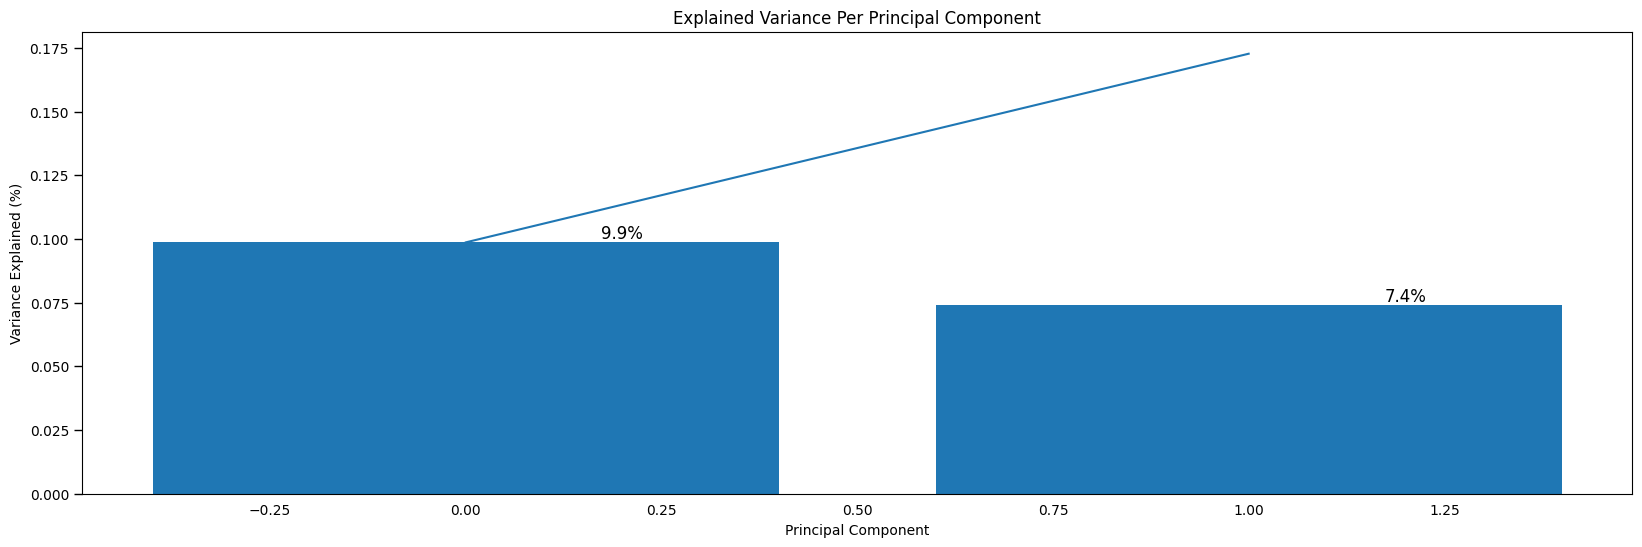

In [38]:
pca = PCA(n_components=2)
pca.fit(X)

x_pca = pca.transform(X)
df_pca = pd.DataFrame(x_pca)
plot(pca)

In [39]:
def plot_data(ax,ds,name=''):
    X, y = ds

    ax.set_title(name)

    for i in range(X.shape[0]):
      plt.text(X[i, 0], X[i, 1], str(y[i]),
                color=plt.cm.tab10((y[i]+0.5) /10 ),
                fontdict={'weight': 'bold', 'size': 9})


    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

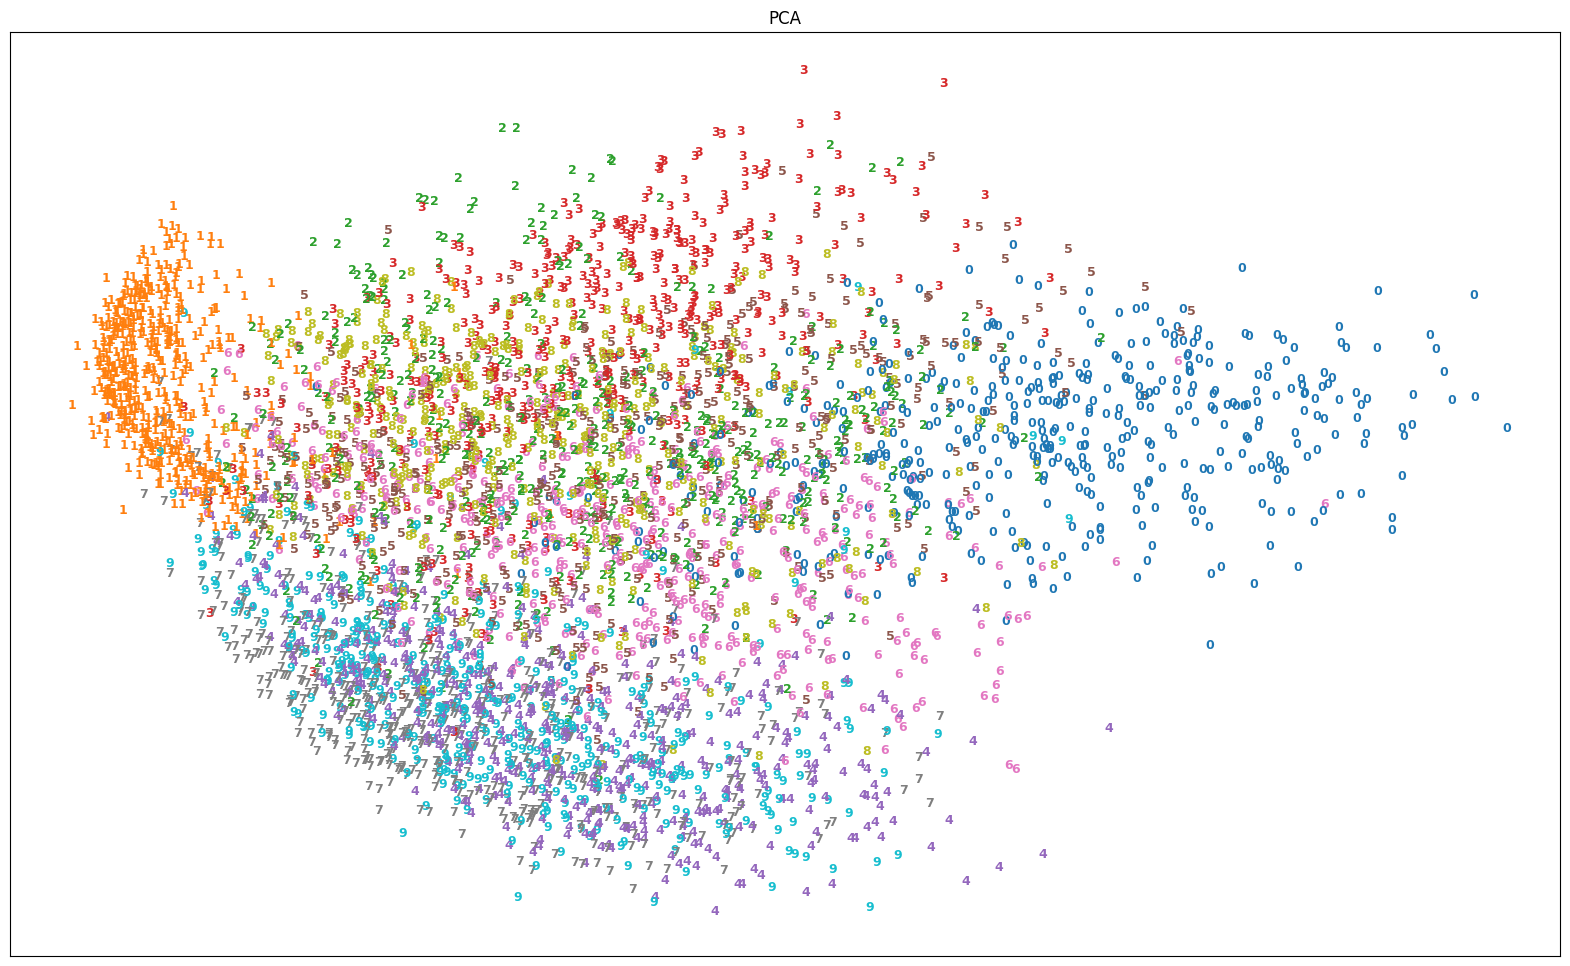

In [40]:
fig= plt.figure(figsize=(20,12))
ax = plt.subplot(1, 1, 1)
plot_data(ax,[np.array(df_pca),y],'PCA')

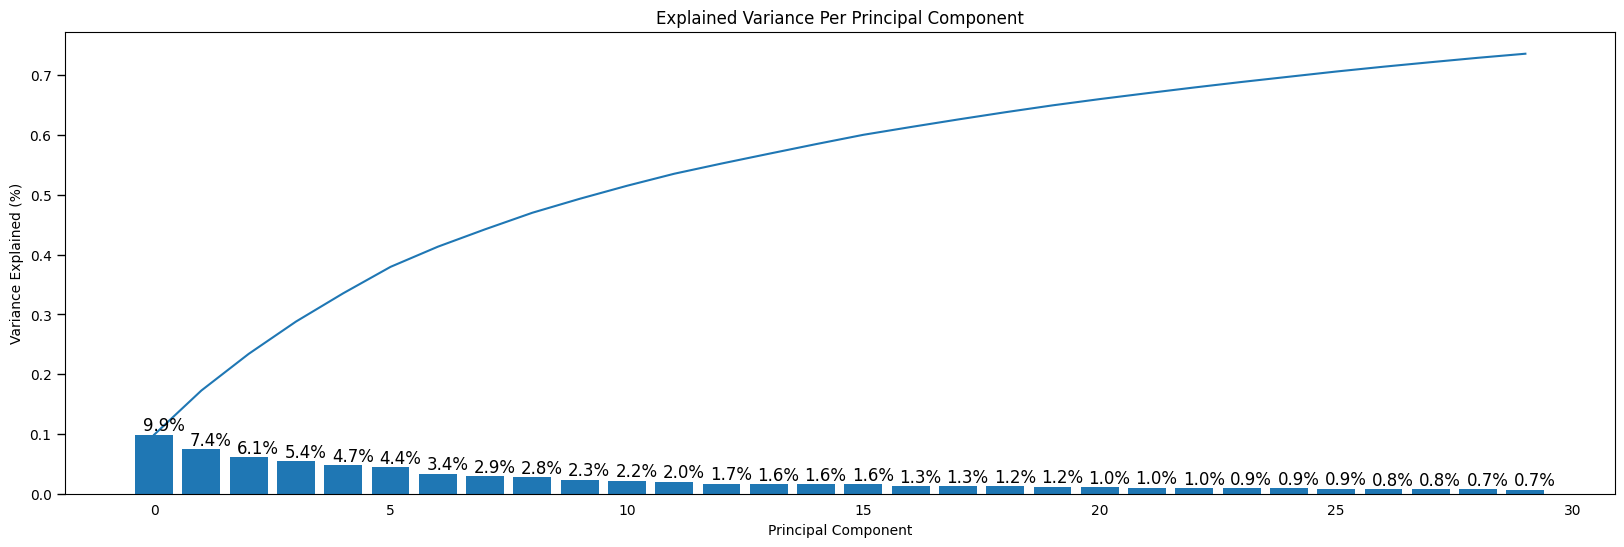

In [80]:
pca = PCA(n_components=30)
pca.fit(X)

x_pca = pca.transform(X)
df_pca = pd.DataFrame(x_pca)
plot(pca)

In [81]:
pca_names = ['pca-'+ str(x+1)for x in range(30)]
df_pca = pd.DataFrame(np.array(df_pca), columns = pca_names)
df_pca

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,...,pca-21,pca-22,pca-23,pca-24,pca-25,pca-26,pca-27,pca-28,pca-29,pca-30
0,0.455479,1.446405,0.126557,2.046413,0.906228,-0.865820,0.714314,0.384282,-1.216945,0.573647,...,-0.491101,-0.896485,-0.717591,0.782354,0.243610,0.363328,1.308676,0.410884,-0.440542,0.078208
1,4.067773,1.515664,-2.162976,2.405227,-2.389845,-1.131793,-0.270137,-0.459939,0.618562,0.415471,...,0.472924,-0.534655,-0.413171,0.460781,0.312724,1.203620,0.080794,0.083837,-0.992318,0.448536
2,-0.111577,-1.777926,0.618294,-1.597378,-1.446322,0.055433,-3.606701,0.785025,-0.744836,-0.807676,...,-0.037489,0.087807,0.016461,-0.038679,0.156511,-0.382181,-0.517543,0.824385,0.218769,1.003232
3,-3.439486,2.337684,-0.610576,-0.585938,-1.167952,2.578159,-1.138525,-0.229752,1.499444,-0.278637,...,0.003721,0.574995,0.088250,-0.004502,0.029897,0.289101,1.069139,0.008520,0.047587,0.374850
4,-1.403014,-2.695087,0.172150,1.067968,0.607839,0.280123,-0.237850,-1.469682,1.010018,0.830286,...,0.491075,0.502298,-0.330728,-0.468586,0.063650,0.249135,0.790294,0.506073,-0.331424,0.386544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.451706,-2.543860,-1.423658,2.080183,-0.585101,0.606743,1.101650,-0.008083,-0.024886,-3.014519,...,-1.061916,-0.258433,0.064117,-0.118262,0.376731,0.318027,-0.830111,-0.583434,0.509063,0.533955
4996,1.403440,3.721935,0.354750,1.293425,1.571779,2.012837,-0.294559,0.746229,-2.861328,0.594963,...,1.753581,-0.316961,-0.686027,1.176260,0.009728,0.223398,-1.392061,0.509841,-0.239710,0.953111
4997,1.860706,0.711022,-0.446944,0.045411,0.209442,1.471718,1.519663,1.319478,-4.102392,-1.099096,...,0.217309,0.154860,1.043555,-1.976907,0.403752,-0.189877,-0.036911,-1.135505,-0.080260,-0.329895
4998,-3.334643,1.001762,0.145458,-0.400286,-2.415124,-1.510746,-0.329135,-0.673979,-0.572305,-0.025747,...,-0.398411,-0.085476,-0.352233,-0.491172,-0.109131,-0.640132,-0.383397,0.143900,0.129764,-0.375543


In [82]:
fig = px.scatter_3d(df_pca, x=df_pca["pca-1"],
                            y=df_pca["pca-2"],
                            z=df_pca["pca-3"],
              color=y)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [41]:
#@title Hyperparameters T-SNE { run: "auto" }
n_iter = 425 #@param {type:"slider", min:250, max:1500, step:25}
perplexity = 25 #@param {type:"slider", min:5, max:50, step:5}

tsne = TSNE(n_components=2, verbose=1,
            perplexity=perplexity, n_iter=n_iter,
            learning_rate = 'auto', init = 'pca')
tsne = tsne.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.036s...
[t-SNE] Computed neighbors for 5000 samples in 1.812s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.157410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.814156
[t-SNE] KL divergence after 425 iterations: 1.820786


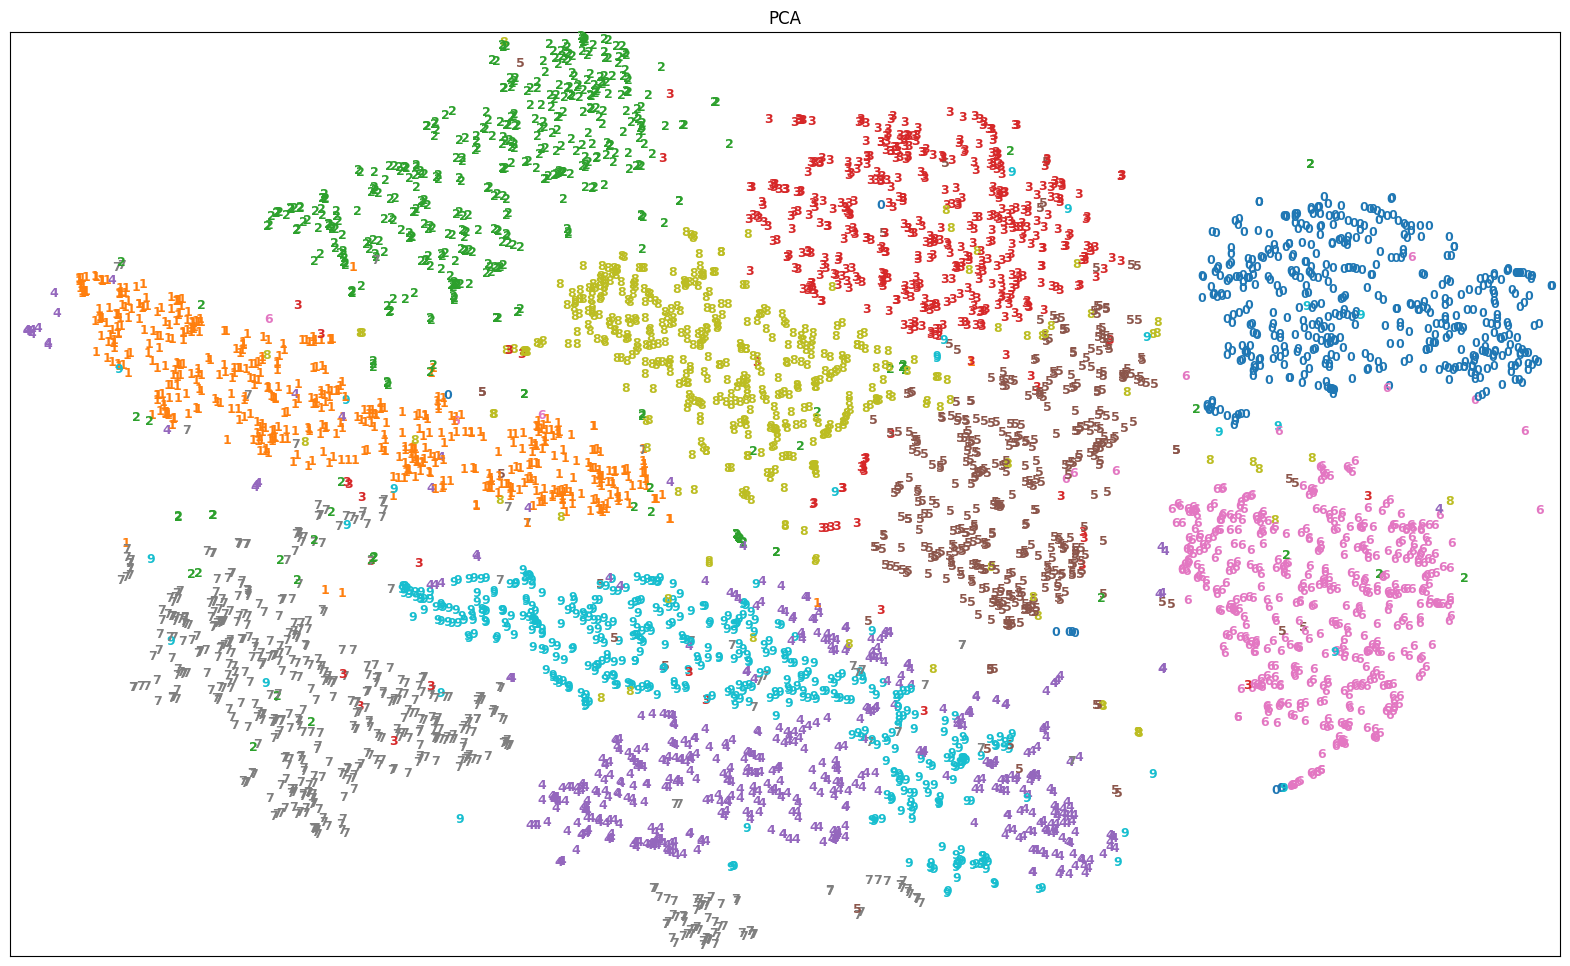

In [42]:
fig= plt.figure(figsize=(20,12))
ax = plt.subplot(1, 1, 1)
plot_data(ax,[np.array(tsne),y],'PCA')

In [83]:
#@title Hyperparameters T-SNE { run: "auto" }
n_iter = 425 #@param {type:"slider", min:250, max:1500, step:25}
perplexity = 25 #@param {type:"slider", min:5, max:50, step:5}

tsne = TSNE(n_components=3, verbose=1,
            perplexity=perplexity, n_iter=n_iter,
            learning_rate = 'auto', init = 'pca')
tsne = tsne.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.038s...
[t-SNE] Computed neighbors for 5000 samples in 3.680s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.157410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.873589
[t-SNE] KL divergence after 425 iterations: 1.554243


In [84]:
df_tsne = pd.DataFrame(tsne, columns=['tsne-1', 'tsne-2', 'tsne-3'])

In [86]:
fig = px.scatter_3d(df_tsne, x=df_tsne["tsne-1"],
                            y=df_tsne["tsne-2"],
                            z=df_tsne["tsne-3"],
              color=y)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [49]:

from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


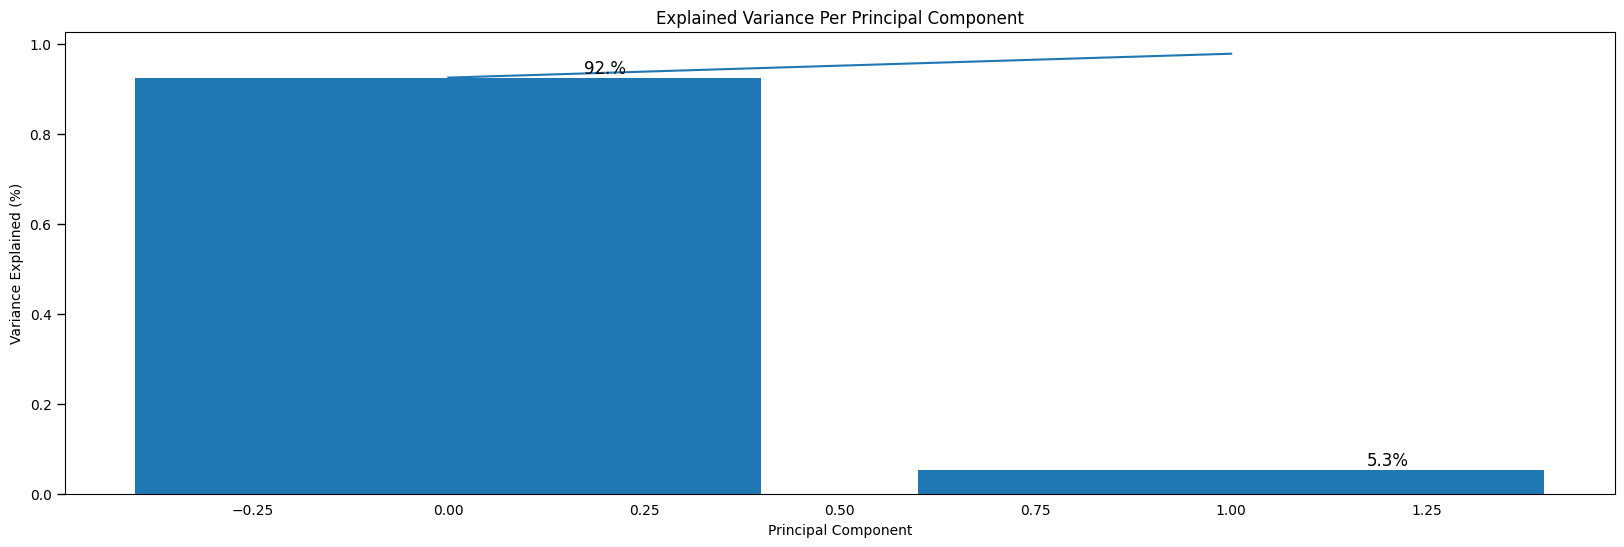

In [50]:

plot(pca)

In [65]:
df = pd.DataFrame(X_pca, columns = ['PCA-1', 'PCA-2'])
df['species'] = [target_names[i] for i in y]  # Map target numbers to target names

# Plot using Plotly
fig = px.scatter(
    df,
    x='PCA-1', y='PCA-2',
    color='species',  # Use target names for color
    labels={'color': 'species'},
    hover_data=[df.index]
)

# Customize layout
fig.update_layout(
    height=700,
    width=700,
    template="plotly_dark"
)

fig.update_traces(textposition='top center')

fig.show()


In [55]:
#@title Hyperparameters T-SNE { run: "auto" }
n_iter = 825 #@param {type:"slider", min:250, max:1500, step:25}
perplexity = 40 #@param {type:"slider", min:5, max:50, step:5}

tsne = TSNE(n_components=2, verbose=1,
            perplexity=perplexity, n_iter=n_iter,
            learning_rate = 'auto', init = 'pca')
tsne = tsne.fit_transform(X)

# Create a DataFrame for easy plotting
df_tsne = pd.DataFrame(tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = y

df = pd.DataFrame(tsne, columns = ['t-SNE_1', 't-SNE_2'])
df['number'] = y.astype(str)
fig = px.scatter(
        df,
        x='t-SNE_1', y='t-SNE_2',
             color = 'number',
       #  text="number",
        labels={'color': 'number'},

        hover_data=[df.index]
)


fig.update_layout(
    height=700,
    width=700,
    template = "plotly_dark"
)

fig.update_traces(textposition='top center')

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.202229
[t-SNE] KL divergence after 1075 iterations: 0.082260
